#                             Heart Disease Diagnostic Analysis

In [12]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [13]:
#Extracting CSV Dataset From System using Pandas Library

data=pd.read_csv('heart_disease_dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [14]:
#All Columns in the Dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

##### There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [15]:
#Checking NULL Values

data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


###### There is NO MISSING Values in our Dataset

## Percentage of people having Heart Disease

In [16]:
num=data.groupby('num').size()
num

,0
num,
0,164
1,139


In [17]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [18]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['num'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


In [19]:
hd=data.groupby('Heart_Disease')['num'].count()
hd

,num
Heart_Disease,
Absence,164
Presence,139


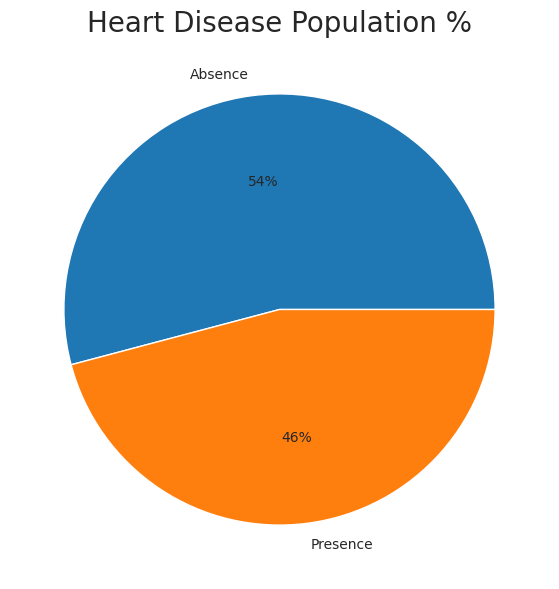

In [20]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

###### From the overall population, people having heart disease (46%) are lesser than those who have heart disease(56%)

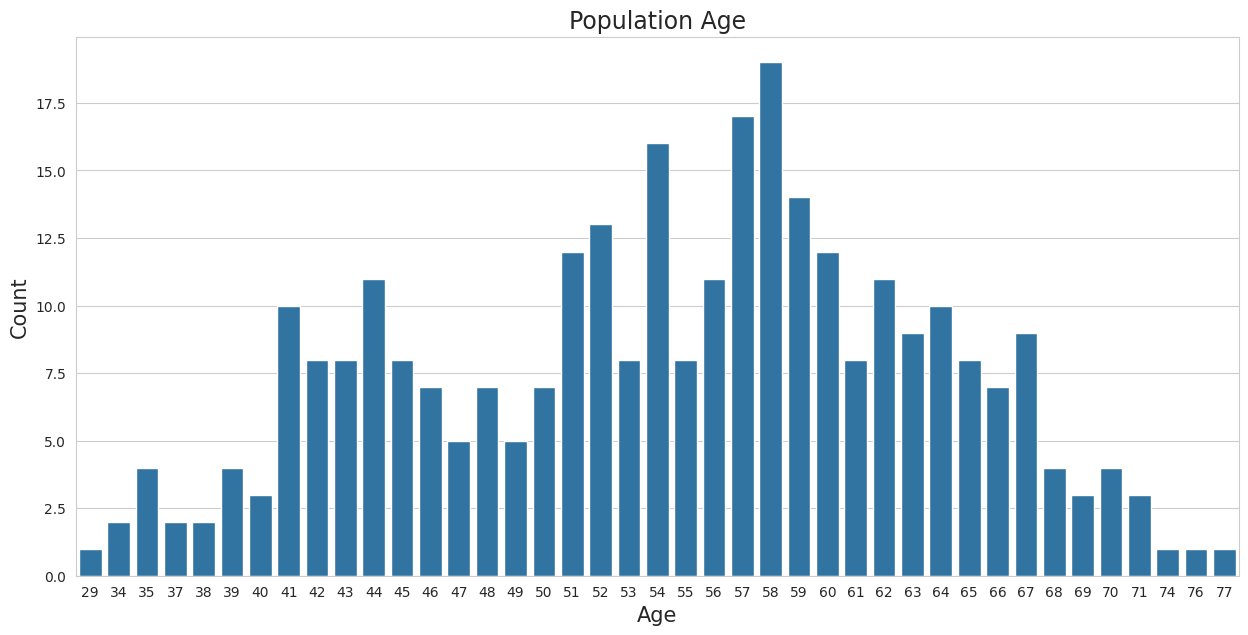

In [21]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

###### -> In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [22]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [23]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


<ipython-input-24-5f1f8f273de1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')


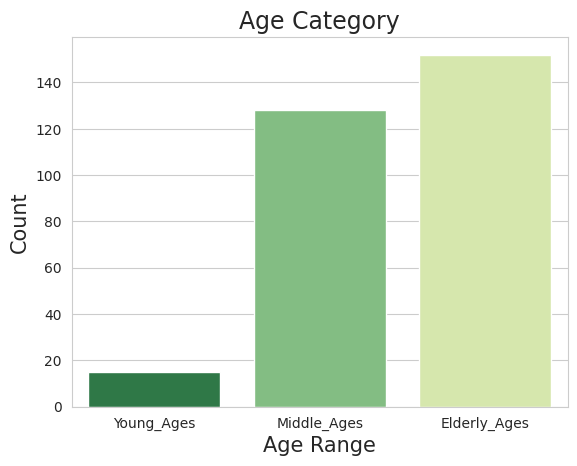

In [24]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [25]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [26]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


In [27]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [28]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age


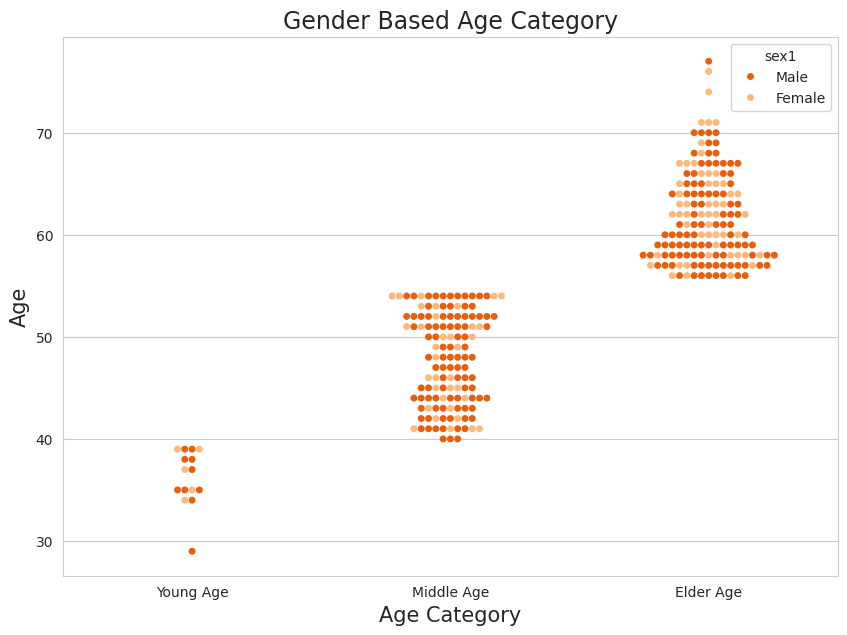

In [29]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

###### -> In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

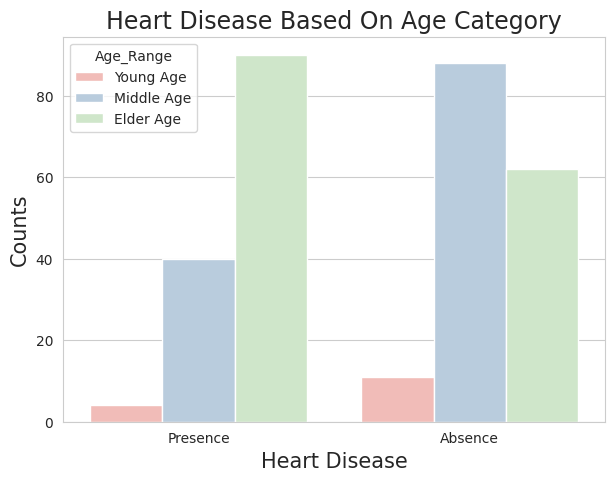

In [30]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

###### -> Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease

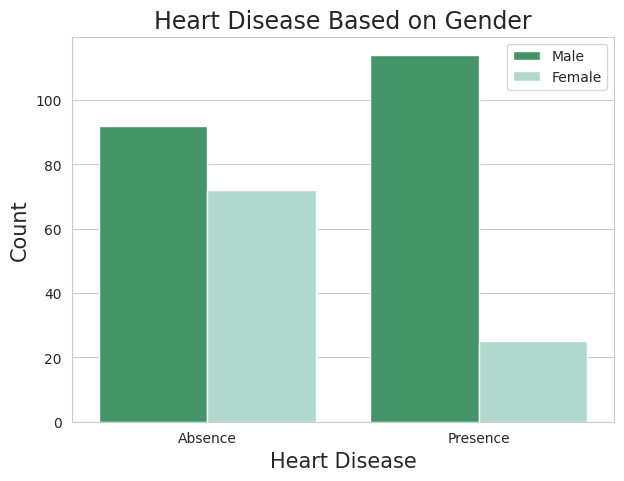

In [31]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

###### -> We can see that Males are more prone to Heart Disease

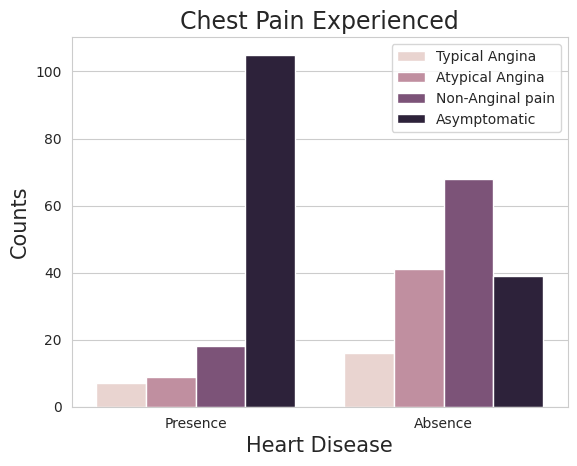

In [32]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> It seems people having asymptomatic chest pain have a higher chance of heart disease

###### -> Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

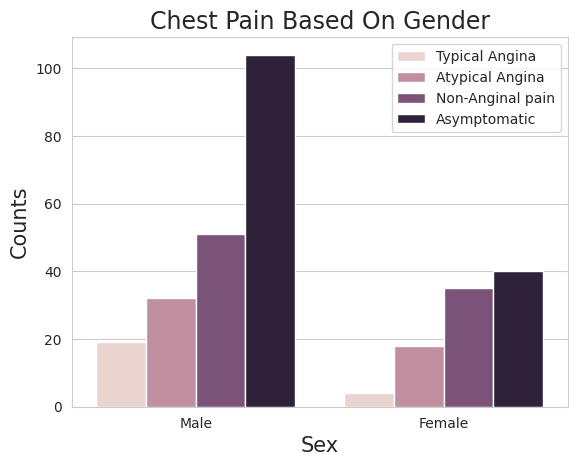

In [33]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> We can see that a higher number of men are suffering from Asymptomatic type of Chest Pain

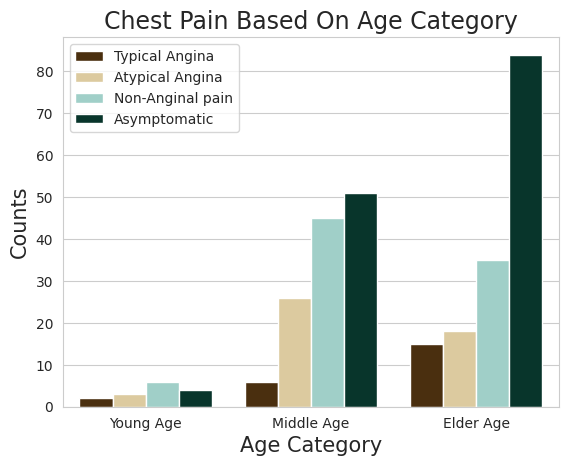

In [34]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> There is very high number of Asymptomatic Pain in Elderly age Category

<ipython-input-35-37e940b55034>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')


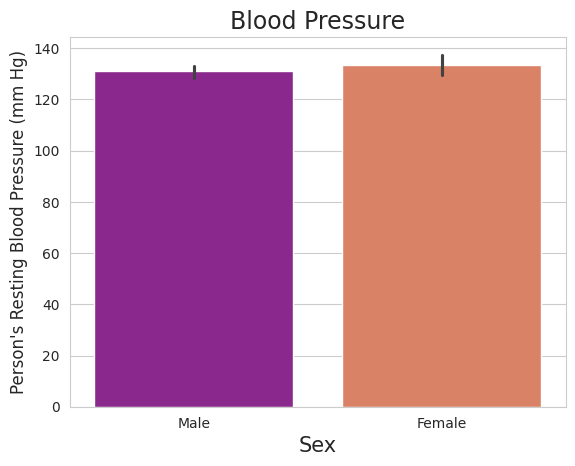

In [35]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

###### -> Blood Pressure Rate is almost equal in Males and Females

<ipython-input-36-4fe2024e27b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='chol', data=data, palette='turbo')


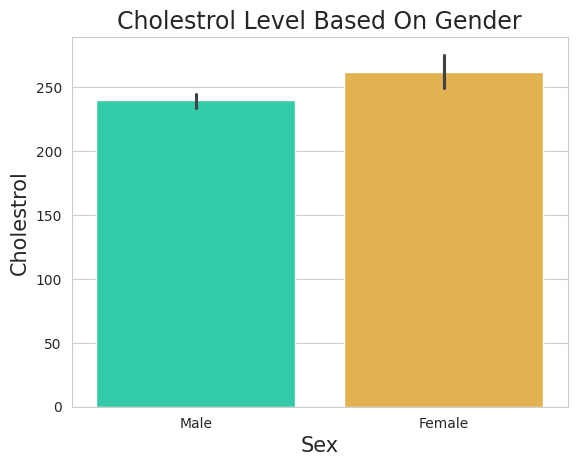

In [36]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

###### -> females have little bit of higher cholesterol than males

<ipython-input-37-8bf9809f64cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')


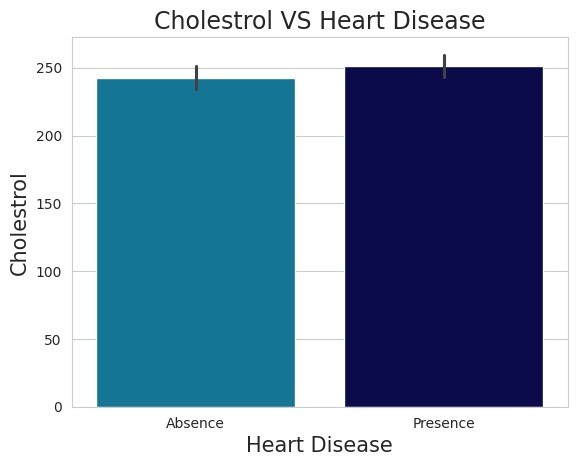

In [37]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Higher Cholestrol Level results Chances Of Heart Disease

<ipython-input-38-df099a8656be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')


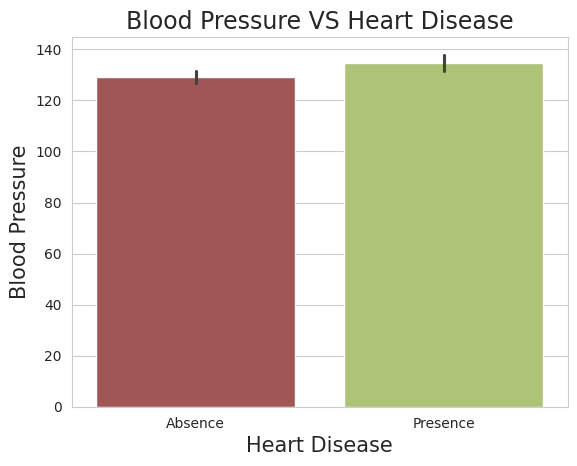

In [38]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

###### -> Higher Blood Pressure Level results Chances Of Heart Disease

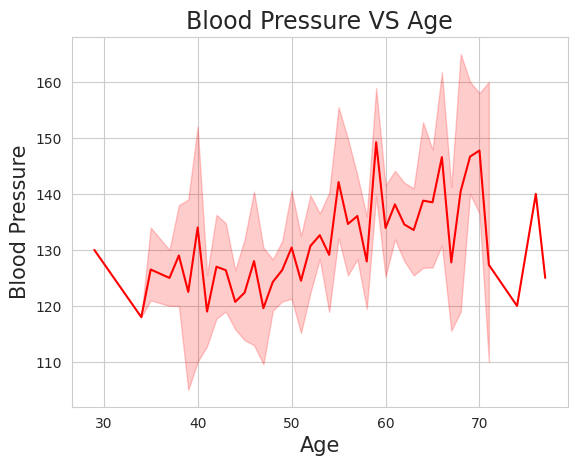

In [39]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

###### -> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

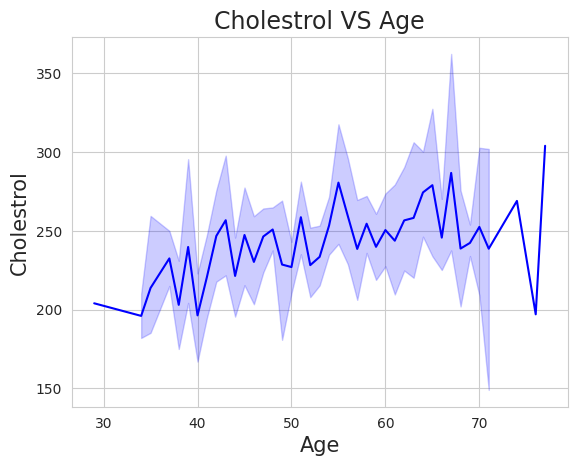

In [40]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Similarly Cholestrol Increasing in the age group of 50-60

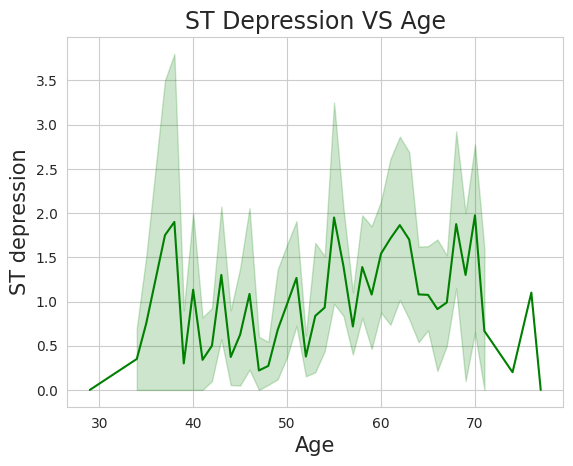

In [41]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

###### -> we can observe from here that ST depression mostly increases bw the age group of 30-40

###### -> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

<ipython-input-42-df7084e7e09e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')


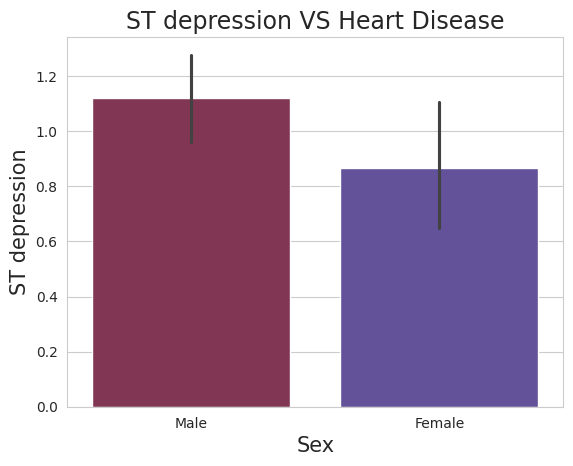

In [42]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

###### -> More Males are prone to ST depression as compare to females

<ipython-input-43-e1ce3acd7cb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')


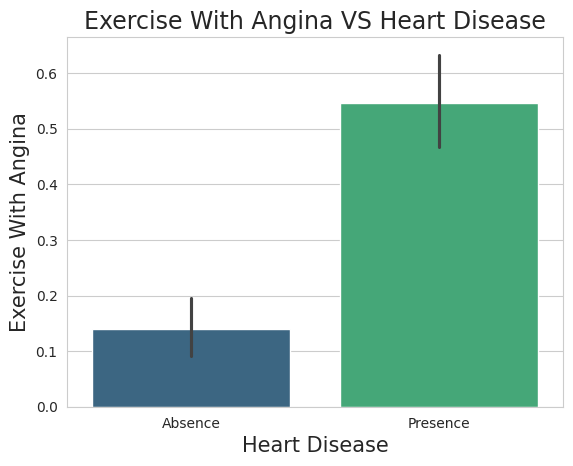

In [43]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

###### -> If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

<ipython-input-44-8c8cd9640718>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')


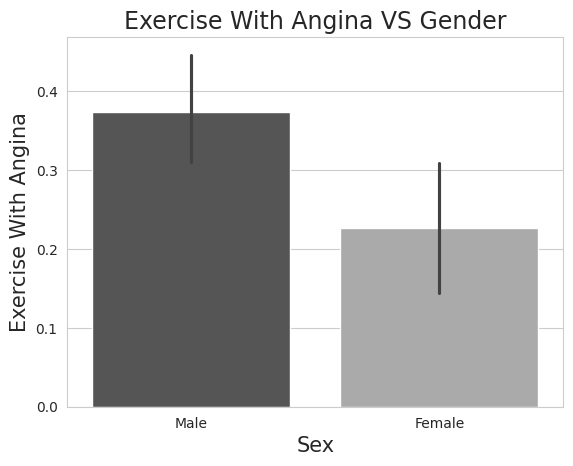

In [44]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

###### -> Males have have high Exercise Angina

###### -> A type of chest pain caused by reduced blood flow to the heart.

<ipython-input-45-b2f433eda42c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')


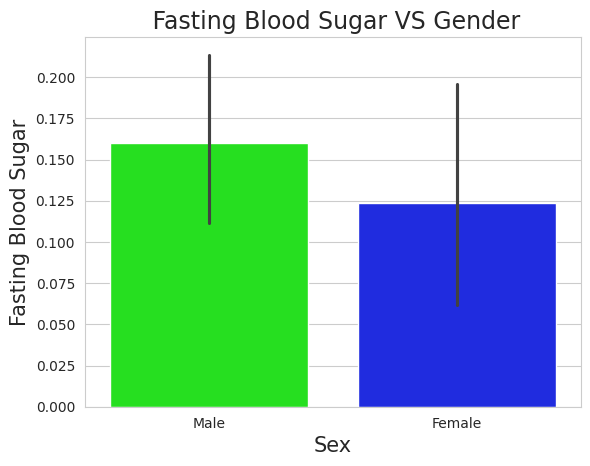

In [45]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

###### -> Males have high no of Fasting Blood Sugar over 120

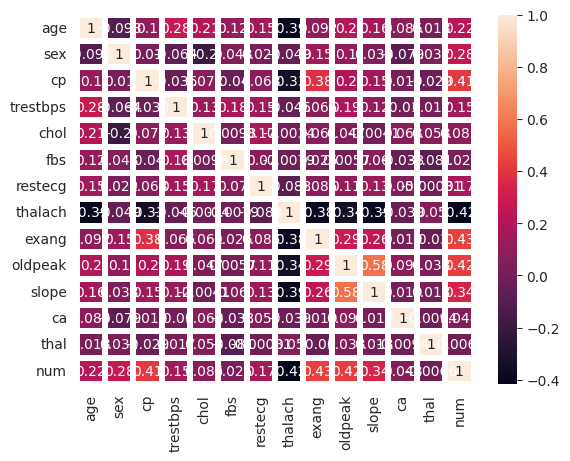

In [47]:
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, linewidths=3)
plt.show()
